## Name Game - Gender Prediction using Sound

### Project Description

The same name can be spelled out in a many ways (for example, Marc and Mark, or Elizabeth and Elisabeth). Sound can, therefore, be a better way to match names than spelling. In this project, I use fuzzy name matching and dataset provided by the US Social Security Administration to predict the genders of authors.

### Purpose

The purpose of the project is to predict the genders of the authors that were listed in the New York Times Best Seller for Children's Picture books. Further, I'll analyze the gender distribution of authors to see if there have been changed over time.

### Data

For the analysis, I use the datas “babynames_nysiis.csv” and "nytkids_yearly.csv".\
The first file contains the unique NYSIIS versions of baby names, and also includes the percentage of times the name appeared as a female name (perc_female) and the percentage of times it appeared as a male name (perc_male).\
The second file records the authors that have appeared in the New York Times Best Seller list for Children's Picture books from 2008 to 2017.


### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fuzzy

### Import author data

In [2]:
# read "nytkids_yearly.csv", which is semicolon delimited
author = pd.read_csv("nytkids_yearly.csv", delimiter = ";")

# create a new column "First_name"
First_name = []
for name in author["Author"]:
    First_name.append(name.split()[0])

author["First_name"] = First_name

# create a new column "Nysiis_name"
# using fuzzy to match the sound of the name
Nysiis_name = []
for name in author["First_name"]:
    Nysiis_name.append(fuzzy.nysiis(name))
author["Nysiis_name"] = Nysiis_name
author

,Year,Book Title,Author,Besteller this year,First_name,Nysiis_name
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR
...,...,...,...,...,...,...
598,2008,WE THE PEOPLE,Lynne Cheney,2,Lynne,LAN
599,2008,BARACK,Jonah Winter,1,Jonah,JAN
600,2008,"LOUISE, THE ADVENTURES OF A CHICKEN",Kate DiCamillo,1,Kate,CAT
601,2008,ON A SCARY SCARY NIGHT,Walter Wick,1,Walter,WALTAR


### Import gender data

Using the percentage of times the name appeared as a female name (perc_female) and a male name (perc_male) to assume the gender.
* If perc_female > perc_male then assume it is a female name
* If perc_female < perc_male then assume it is a male name
* If the percentages are equal then it is a neutral name

In [3]:
# read "babynames_nysiis.csv", which is semicolon delimited
babies = pd.read_csv("babynames_nysiis.csv", delimiter = ";")

# create a new column "Gender"
gender = []
for i in babies.index:
    if babies.loc[i, "perc_female"] > babies.loc[i, "perc_male"]:
        gender.append("F")
    elif babies.loc[i, "perc_female"] < babies.loc[i, "perc_male"]:
        gender.append("M")
    elif babies.loc[i, "perc_female"] == babies.loc[i, "perc_male"]:
        gender.append("N")
babies["Gender"] = gender
babies

,babynysiis,perc_female,perc_male,Gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M
...,...,...,...,...
17135,RALFAL,0.00,100.00,M
17136,YALASAVAT,100.00,0.00,F
17137,VARLAT,100.00,0.00,F
17138,DASTANAN,100.00,0.00,F


### Playing matchmaker

Now that we have identified the likely genders of different names, let's find author genders by searching for each author's name in the <code>babies</code> DataFrame, and extracting the associated gender.

In [4]:
# create a new column "author_gender" in author DataFrame
author_gender = []
for name in author["Nysiis_name"]:
    if name in list(babies["babynysiis"]):
        index = list(babies["babynysiis"]).index(name)
        author_gender.append(babies.loc[index, "Gender"])
    else:
        author_gender.append("Unknown")
author["Author_gender"] = author_gender
author

,Year,Book Title,Author,Besteller this year,First_name,Nysiis_name,Author_gender
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN,M
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY,F
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR,M
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR,M
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR,M
...,...,...,...,...,...,...,...
598,2008,WE THE PEOPLE,Lynne Cheney,2,Lynne,LAN,F
599,2008,BARACK,Jonah Winter,1,Jonah,JAN,F
600,2008,"LOUISE, THE ADVENTURES OF A CHICKEN",Kate DiCamillo,1,Kate,CAT,F
601,2008,ON A SCARY SCARY NIGHT,Walter Wick,1,Walter,WALTAR,M


In [5]:
author["Author_gender"].value_counts()

F          395
M          191
Unknown      9
N            8
Name: Author_gender, dtype: int64

### Plotting data

Generate a bar chart to see if the gender distribution of authors have been changed over time.

<BarContainer object of 10 artists>

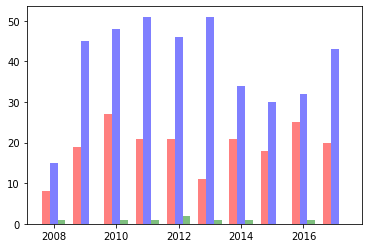

In [6]:
# create a list of unique years, sorted in ascending order.
years = np.unique(author["Year"])

# initializing lists
male_by_years = []
female_by_years = []
unknown_by_years = []

# create a DataFrame to find the number of male, female and unknown authors per year
for year in years:
    male_by_years.append(len(author[(author["Author_gender"] == "M") & (author["Year"] == year)]))
    female_by_years.append(len(author[(author["Author_gender"] == "F") & (author["Year"] == year)]))
    unknown_by_years.append(len(author[(author["Author_gender"] == "N") & (author["Year"] == year)]))

data = np.array([male_by_years, female_by_years, unknown_by_years])
gender_over_years = pd.DataFrame(data, columns = years, index = ["male", "female", "unknown"])

# plotting
%matplotlib inline
plt.bar(x = years-0.25, height = male_by_years, color = "red", alpha = 0.5, width = 0.25)
plt.bar(x = years, height = female_by_years, color = "blue", alpha = 0.5, width = 0.25)
plt.bar(x = years+0.25, height = unknown_by_years, color = "green", alpha = 0.5, width = 0.25)